In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

In [2]:
fs=1000 #frec de muestreo
fc=200 #frec de corte
M=37 #numero de coeficientes

In [4]:
# Creación del filtro FIR
fir_coeff = firwin(numtaps=M, cutoff=fc, window='hamming', fs=fs)

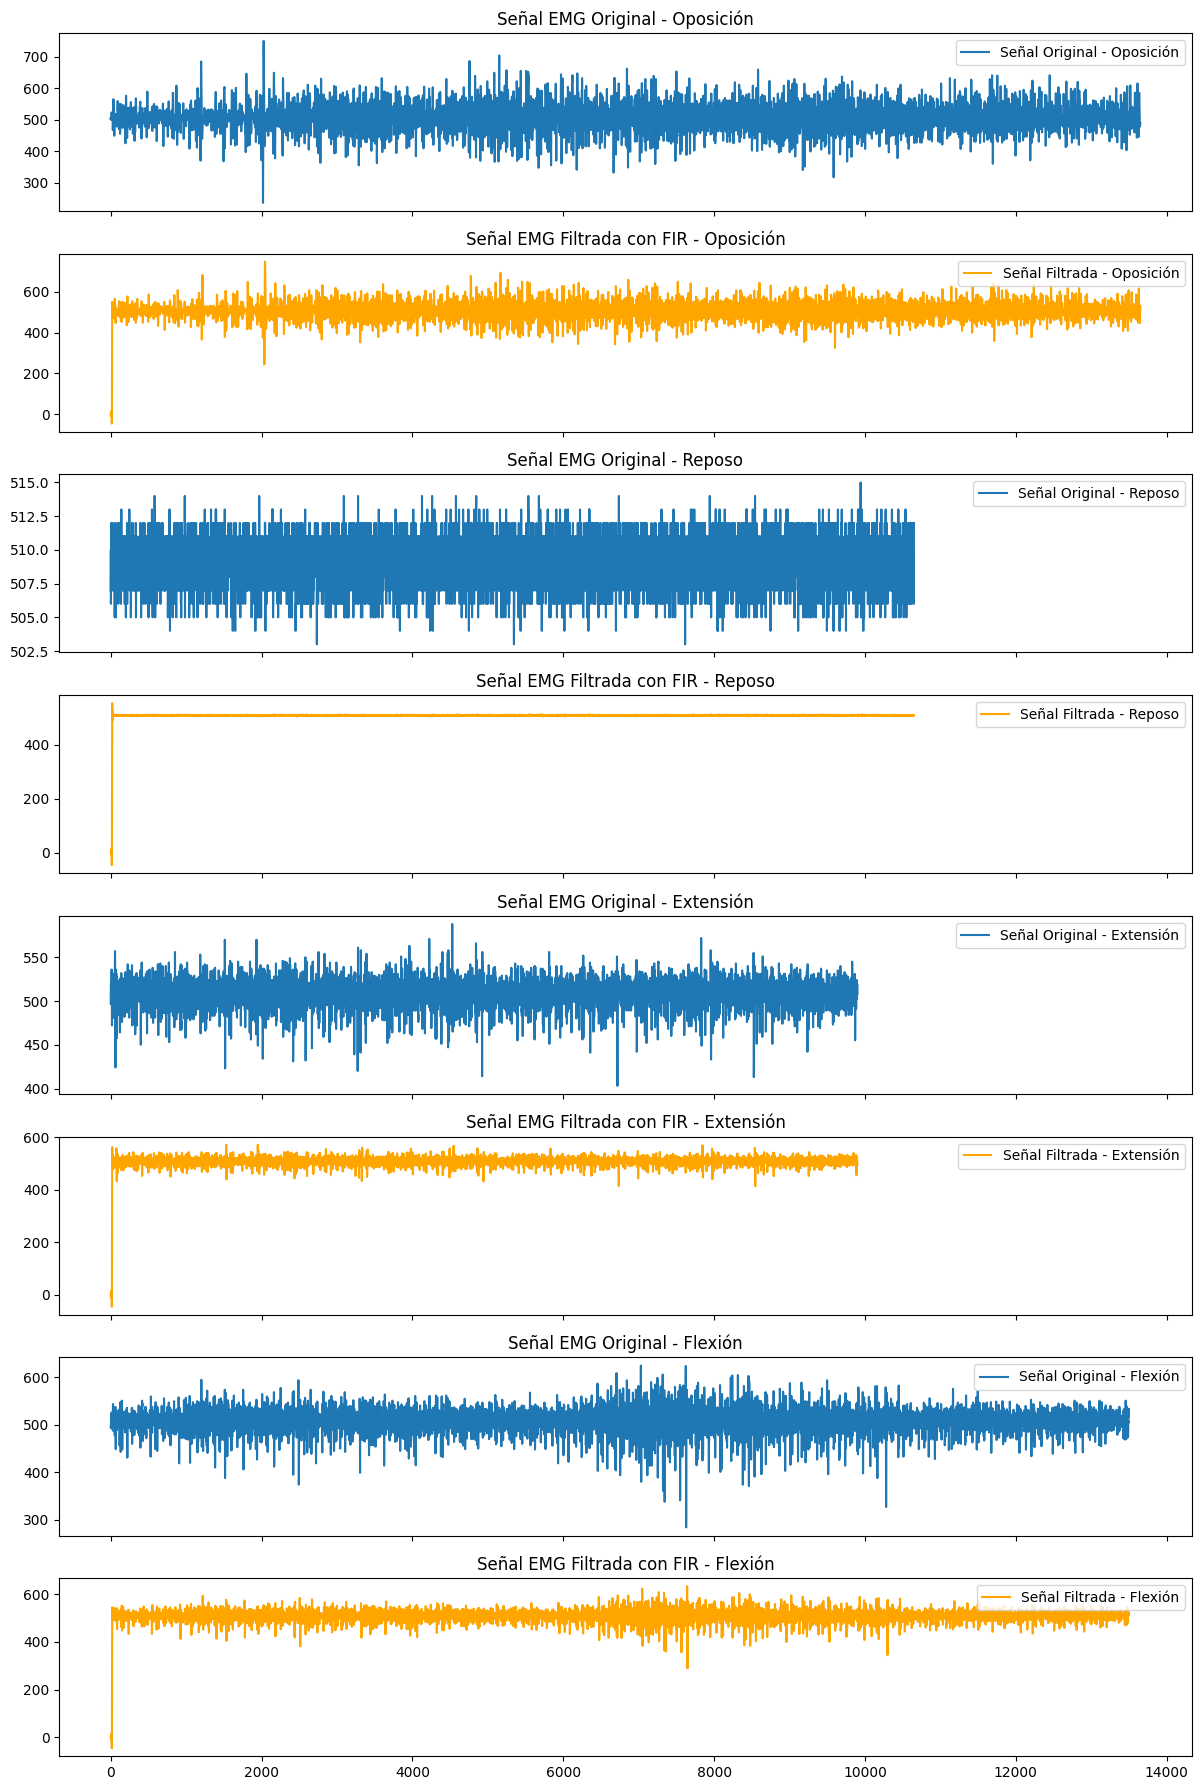

In [9]:
fig, axes = plt.subplots(8, 1, figsize=(12, 18), sharex=True)

files = {
    'Oposición': 'C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Oposicion.txt',
    'Reposo': 'C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Reposo.txt',
    'Extensión': 'C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Extension.txt',
    'Flexión': 'C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Flexion1.txt'
}

for i, (label, file_path) in enumerate(files.items()):
    data = np.loadtxt(file_path)
    signal = data[:, 5]  
    
    # Aplicar el filtro FIR
    filtered_signal = lfilter(fir_coeff, 1, signal)
    
    # Plot señal original
    ax = axes[2*i]
    ax.plot(signal, label=f'Señal Original - {label}')
    ax.legend(loc='upper right')
    ax.set_title(f'Señal EMG Original - {label}')
    
    # Plot señal filtrada
    ax = axes[2*i + 1]
    ax.plot(filtered_signal, label=f'Señal Filtrada - {label}', color='orange')
    ax.legend(loc='upper right')
    ax.set_title(f'Señal EMG Filtrada con FIR - {label}')

    
plt.tight_layout()
plt.show()

### Filtro IIIR

In [4]:
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt


In [5]:
fs = 1000  # frec de muestreo
fc = 200   # frac de corte 
order = 5

#Diseño del filtro FIR pasa - bajos
b, a = butter(order, fc / (fs / 2), btype='low')

In [6]:
files = {
    'Oposición': 'C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Oposicion.txt',
    'Reposo': 'C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Reposo.txt',
    'Extensión': 'C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Extension.txt',
    'Flexión': 'C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Flexion1.txt'
}

FileNotFoundError: C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Oposicion.txt not found.

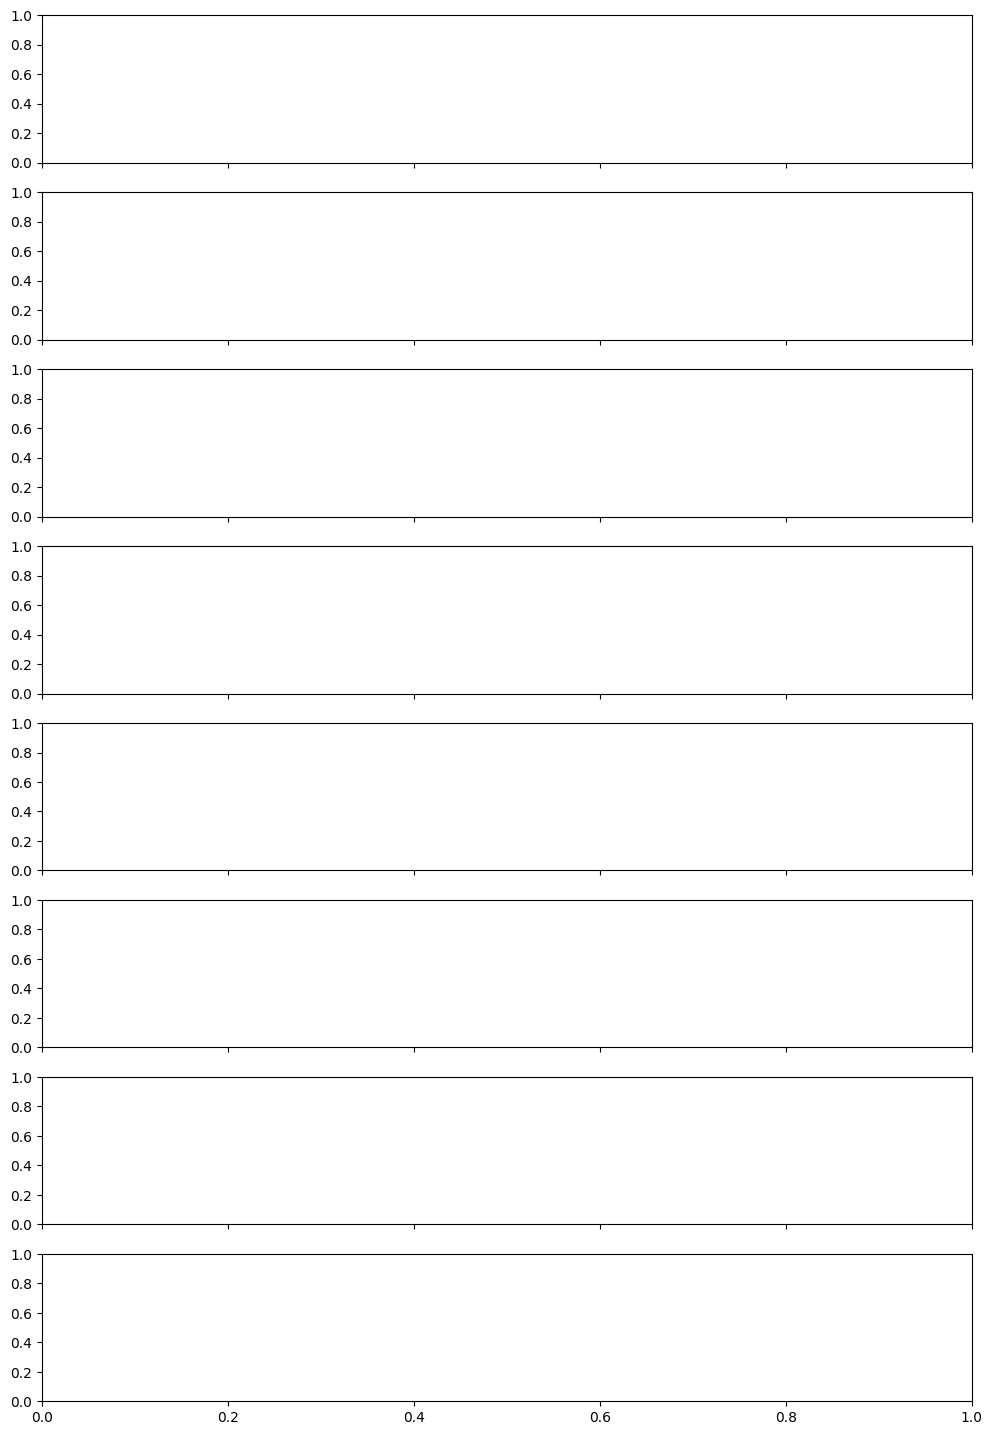

In [9]:
fig, axes = plt.subplots(8, 1, figsize=(12, 18), sharex=True)


for i, (label, file_path) in enumerate(files.items()):
    data = np.loadtxt(file_path)
    signal = data[:, 5]  
    
    # Aplicar el filtro FIR
    filtered_signal = lfilter(fir_coeff, 1, signal)
    
    # Obtener el tiempo en segundos
    time_sec = np.arange(len(signal)) / fs
    
    # Plot señal original
    ax = axes[2*i]
    ax.plot(time_sec, signal, label=f'Señal Original - {label}')
    ax.legend(loc='upper right')
    ax.set_title(f'Señal EMG Original - {label}')
    ax.set_xlabel('Time (s)')
    
    # Plot señal filtrada
    ax = axes[2*i + 1]
    ax.plot(time_sec, filtered_signal, label=f'Señal Filtrada - {label}', color='orange')
    ax.legend(loc='upper right')
    ax.set_title(f'Señal EMG Filtrada con FIR - {label}')
    ax.set_xlabel('Time (s)')
    
plt.tight_layout()
plt.show()